In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import files

# Prompt file upload
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
from google.colab import files

# Prompt file upload
uploaded = files.upload()

Saving test.csv to test (1).csv


In [ ]:
import pandas as pd
df =

SyntaxError: invalid syntax (ipython-input-2217362098.py, line 2)

In [ ]:

# 📥 NLTK Downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
print("Train NaN values:\n", train_df.isnull().sum())
print("Test NaN values:\n", test_df.isnull().sum())

Train NaN values:
 Class Index    0
Title          0
Description    0
dtype: int64
Test NaN values:
 Class Index    0
Title          0
Description    0
dtype: int64


In [ ]:
train_df.fillna('fill',inplace=True)
test_df.fillna('fill',inplace=True)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove numbers and punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [ ]:
# 7. Encode labels (don't overwrite 'Description' column)
label_map = {'positive': 1, 'negative': 0}
train_df['Title'] = train_df['Description'].map(label_map)
test_df['Title'] = test_df['Description'].map(label_map)

# 8. Split features and target
X = train_df['Description']
y = train_df['Title']


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
import pandas as pd
df=pd.read_csv("train.csv")


In [ ]:
import pandas as pd
df=pd.read_csv("test.csv")

In [ ]:
# 5️⃣ Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Description'])
y = df['Description']  # Make sure the label is numerical (0–3)

In [ ]:
X

In [ ]:
y

In [ ]:
# ✨ Vectorize Cleaned Text
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(train_df["Description"])


In [ ]:
# Use training data for both features and labels
X_vec = vectorizer.fit_transform(train_df["Description"])
y = train_df["Title"]

# Now this will work smoothly!
X_train, X_val, y_train, y_val = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import warnings

In [ ]:
# Drop rows where target is NaN
train_df = train_df.dropna(subset=["Title"])

# Recreate vectorized features and labels
X_vec = vectorizer.fit_transform(train_df["Description"])
y = train_df["Title"]

# Now do the train/validation split
X_train, X_val, y_train, y_val = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'fill'

In [ ]:
print(y.isna().sum())  # Should be 0


0


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'fill'

In [ ]:
# 12. Evaluation on validation set
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:

# 13. Apply same TF-IDF to test data
X_test = vectorizer.transform(test_df['Description'])
y_test = test_df['Title']
test_preds = model.predict(X_test)
print("Test Evaluation:\n", classification_report(y_test, test_preds))


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

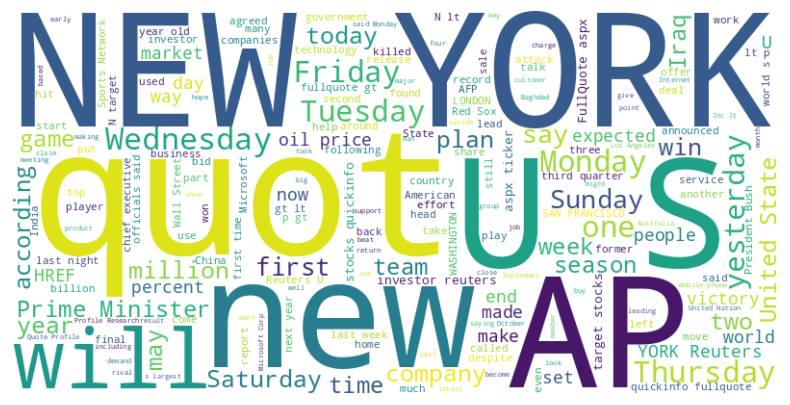

In [ ]:

all_words = ' '.join(train_df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
